In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

# load image

In [2]:
image_url = 'http://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg'
image_filepath = 'dog.jpg'
gcv.utils.download(url=image_url, path=image_filepath)

'dog.jpg'

In [3]:
image = mx.image.imread('./dog.jpg')
print('shape: ', image.shape)
print('data type: ', image.dtype)
print('minimum value: ', image.min().asscalar())
print('maximum value: ', image.max().asscalar())

shape:  (576, 768, 3)
data type:  <class 'numpy.uint8'>
minimum value:  0
maximum value:  255


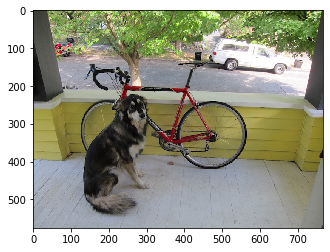

In [4]:
plt.imshow(image.asnumpy())

# Image transform

In [5]:
from mxnet.gluon.data.vision import transforms
transform_fn = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([.485, .456, .406], [.229, .224, .225])
])

In [6]:
image = transform_fn(image)
print('shape: ', image.shape)
print('data type: ', image.dtype)
print('minimum value: ', image.min().asscalar())
print('maximum value: ',image.max().asscalar())

shape:  (3, 576, 768)
data type:  <class 'numpy.float32'>
minimum value:  -2.117904
maximum value:  2.64


# batch image

In [7]:
image = image.expand_dims(0)
print(image.shape)

(1, 3, 576, 768)


# load model

In [9]:
network = gcv.model_zoo.get_model('fcn_resnet50_ade', pretrained=True)


  1%|▊                                                                          | 1499/128831 [00:09<18:57, 111.94KB/s]


  2%|█▊                                                                          | 3163/128831 [00:22<45:14, 46.29KB/s]


  4%|██▊                                                                        | 4875/128831 [00:33<10:17, 200.65KB/s]


  5%|███▊                                                                       | 6475/128831 [00:43<10:21, 196.88KB/s]


  6%|████▌                                                                      | 7899/128831 [00:53<11:52, 169.64KB/s]


  7%|█████▌                                                                     | 9472/128831 [01:03<14:00, 142.00KB/s]


  9%|██████▎                                                                   | 11067/128831 [01:12<14:30, 135.22KB/s]


 10%|███████▎                                                                  | 12667/128831 [01:22<16:34, 116.86KB/s]


 11%|████████▏                                                                 | 14283/128831 [01:32<16:21, 116.70KB/s]


 12%|█████████▏                                                                | 15899/128831 [01:42<16:03, 117.19KB/s]


 14%|██████████                                                                | 17509/128831 [01:52<16:11, 114.62KB/s]


 15%|██████████▉                                                               | 19099/128831 [02:01<09:40, 189.13KB/s]


 16%|███████████▊                                                              | 20603/128831 [02:11<08:47, 205.15KB/s]


 17%|████████████▊                                                             | 22219/128831 [02:21<08:39, 205.41KB/s]


 18%|█████████████▋                                                            | 23819/128831 [02:31<08:17, 210.96KB/s]


 20%|██████████████▌                                                           | 25355/128831 [02:41<08:28, 203.41KB/s]


 21%|███████████████▍                                                          | 26923/128831 [02:51<08:25, 201.68KB/s]


 22%|████████████████▎                                                         | 28491/128831 [03:01<07:56, 210.49KB/s]


 23%|█████████████████▏                                                        | 30011/128831 [03:10<10:55, 150.79KB/s]


 25%|██████████████████▏                                                       | 31627/128831 [03:21<14:58, 108.23KB/s]


 26%|███████████████████                                                       | 33243/128831 [03:30<13:53, 114.74KB/s]


 27%|████████████████████                                                      | 34843/128831 [03:40<13:59, 111.95KB/s]


 28%|████████████████████▉                                                     | 36483/128831 [03:49<12:58, 118.61KB/s]


 30%|█████████████████████▉                                                    | 38112/128831 [03:59<07:44, 195.50KB/s]


 31%|██████████████████████▊                                                   | 39643/128831 [04:09<06:56, 214.09KB/s]


 32%|███████████████████████▋                                                  | 41195/128831 [04:18<07:01, 207.97KB/s]


 33%|████████████████████████▌                                                 | 42779/128831 [04:28<06:51, 209.09KB/s]


 34%|█████████████████████████▍                                                | 44331/128831 [04:38<06:39, 211.74KB/s]


 36%|██████████████████████████▎                                               | 45803/128831 [04:48<06:41, 206.75KB/s]


 37%|███████████████████████████▏                                              | 47371/128831 [04:58<07:21, 184.70KB/s]


 38%|████████████████████████████▏                                             | 49051/128831 [05:12<12:12, 108.93KB/s]


 39%|█████████████████████████████                                             | 50539/128831 [05:21<06:16, 208.02KB/s]


 40%|█████████████████████████████▉                                            | 52091/128831 [05:34<06:42, 190.47KB/s]


 42%|██████████████████████████████▊                                           | 53611/128831 [05:43<06:44, 185.76KB/s]


 43%|███████████████████████████████▉                                           | 54827/128831 [05:59<35:15, 34.99KB/s]


 43%|████████████████████████████████▌                                          | 55915/128831 [06:18<23:54, 50.82KB/s]


 44%|████████████████████████████████▋                                         | 56987/128831 [06:31<11:00, 108.78KB/s]


 46%|█████████████████████████████████▋                                        | 58619/128831 [06:40<10:02, 116.61KB/s]


 47%|██████████████████████████████████▌                                       | 60187/128831 [06:50<10:08, 112.88KB/s]


 48%|███████████████████████████████████▌                                      | 61835/128831 [07:00<10:27, 106.70KB/s]


 49%|████████████████████████████████████▍                                     | 63454/128831 [07:10<06:20, 171.93KB/s]


 50%|█████████████████████████████████████▎                                    | 65019/128831 [07:19<04:59, 213.37KB/s]


 52%|██████████████████████████████████████▎                                   | 66741/128831 [07:32<07:20, 141.06KB/s]


 53%|███████████████████████████████████████▏                                  | 68251/128831 [07:41<04:54, 205.44KB/s]


 54%|████████████████████████████████████████▋                                  | 69883/128831 [07:55<30:34, 32.13KB/s]


 55%|█████████████████████████████████████████▌                                 | 71387/128831 [08:08<10:46, 88.88KB/s]


 57%|█████████████████████████████████████████▉                                | 73019/128831 [08:19<07:21, 126.47KB/s]


 58%|███████████████████████████████████████████▍                               | 74587/128831 [08:30<10:48, 83.61KB/s]


 59%|███████████████████████████████████████████▌                              | 75931/128831 [08:41<05:30, 160.17KB/s]


 60%|████████████████████████████████████████████▌                             | 77547/128831 [08:51<06:22, 134.04KB/s]


 61%|█████████████████████████████████████████████▍                            | 79163/128831 [09:01<07:13, 114.53KB/s]


 63%|██████████████████████████████████████████████▍                           | 80779/128831 [09:10<06:53, 116.14KB/s]


 64%|███████████████████████████████████████████████▎                          | 82427/128831 [09:20<06:39, 116.26KB/s]


 65%|████████████████████████████████████████████████▎                         | 84066/128831 [09:30<07:06, 105.03KB/s]


 67%|█████████████████████████████████████████████████▏                        | 85674/128831 [09:40<04:10, 172.41KB/s]


 68%|██████████████████████████████████████████████████▋                        | 87003/128831 [09:53<07:34, 91.99KB/s]


 69%|██████████████████████████████████████████████████▉                       | 88603/128831 [10:03<05:30, 121.67KB/s]


 70%|███████████████████████████████████████████████████▊                      | 90235/128831 [10:13<06:09, 104.46KB/s]


 71%|████████████████████████████████████████████████████▋                     | 91825/128831 [10:23<04:28, 137.59KB/s]


 73%|█████████████████████████████████████████████████████▋                    | 93403/128831 [10:33<02:54, 202.65KB/s]


 74%|██████████████████████████████████████████████████████▌                   | 94923/128831 [10:42<02:52, 196.76KB/s]


 75%|███████████████████████████████████████████████████████▌                  | 96683/128831 [10:53<02:37, 204.50KB/s]


 76%|████████████████████████████████████████████████████████▍                 | 98283/128831 [11:03<02:34, 198.17KB/s]


 78%|█████████████████████████████████████████████████████████▍                | 99995/128831 [11:16<04:13, 113.80KB/s]


 79%|█████████████████████████████████████████████████████████▌               | 101673/128831 [11:26<02:44, 165.55KB/s]


 80%|██████████████████████████████████████████████████████████▌              | 103275/128831 [11:36<02:03, 206.41KB/s]


 81%|███████████████████████████████████████████████████████████▍             | 104795/128831 [11:45<02:00, 199.63KB/s]


 83%|████████████████████████████████████████████████████████████▎            | 106347/128831 [11:55<01:44, 214.45KB/s]


 84%|█████████████████████████████████████████████████████████████▏           | 107931/128831 [12:04<01:38, 212.61KB/s]


 85%|██████████████████████████████████████████████████████████████           | 109419/128831 [12:14<02:08, 150.70KB/s]


 86%|██████████████████████████████████████████████████████████████▉          | 111035/128831 [12:23<02:32, 116.61KB/s]


 87%|████████████████████████████████████████████████████████████████▋         | 112603/128831 [12:35<03:28, 77.68KB/s]


 89%|██████████████████████████████████████████████████████████████████        | 114987/128831 [13:05<03:32, 65.17KB/s]


 91%|██████████████████████████████████████████████████████████████████▏      | 116779/128831 [13:16<01:54, 105.66KB/s]


 92%|███████████████████████████████████████████████████████████████████▏     | 118576/128831 [13:28<01:38, 103.70KB/s]


 93%|████████████████████████████████████████████████████████████████████     | 120076/128831 [13:38<01:01, 141.45KB/s]


 95%|████████████████████████████████████████████████████████████████████▉    | 121771/128831 [13:48<00:38, 181.23KB/s]


 96%|██████████████████████████████████████████████████████████████████████   | 123547/128831 [13:59<00:25, 208.38KB/s]


 97%|██████████████████████████████████████████████████████████████████████▉  | 125099/128831 [14:09<00:18, 200.77KB/s]


 98%|███████████████████████████████████████████████████████████████████████▊ | 126731/128831 [14:19<00:12, 162.14KB/s]


100%|████████████████████████████████████████████████████████████████████████▊| 128475/128831 [14:29<00:02, 120.63KB/s]


100%|████████████████████████████████████████████████████████████████████████▉| 128779/128831 [14:31<00:00, 188.81KB/s]
128832KB [14:31, 147.88KB/s]                                                                                           


In [10]:
!ls -sh /home/ec2-user/.mxnet/models/fcn_resnet50_ade*.params

'ls' is not recognized as an internal or external command,
operable program or batch file.


# Make prediction

In [11]:
output = network.demo(image)
print(output.shape)

(1, 150, 576, 768)


C:\Users\tehse\Anaconda3\lib\site-packages\gluoncv\model_zoo\segbase.py:92: UserWarning: demo method will be deprecated in favor of predict.
  warnings.warn('demo method will be deprecated in favor of predict.')


In [12]:
output = output[0]
print(output.shape)

(150, 576, 768)


# Closer look: pixel slice

In [13]:
px_height, px_width = 300,500

In [14]:
px_logit = output[:, px_height, px_width]

In [15]:
px_probability = mx.nd.softmax(px_logit)
px_rounded_probability = mx.nd.round(px_probability*100)/100
print(px_rounded_probability)


[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.96 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
<NDArray 150 @cpu(0)>


In [16]:
class_index = mx.nd.argmax(px_logit, axis=0)
class_index = class_index[0].astype('int').asscalar()
print(class_index)

127


In [17]:
from gluoncv.data.ade20k.segmentation import ADE20KSegmentation
class_label = ADE20KSegmentation.CLASSES[class_index]
print(class_label)

bicycle, bike, wheel, cycle


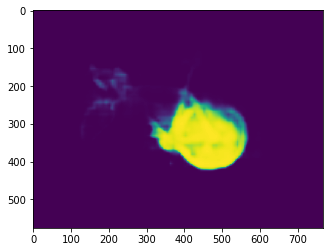

In [18]:
output_proba = mx.nd.softmax(output, axis=0)

output_heatmap =output_proba[127]
plt.imshow(output_heatmap.asnumpy())

# Visualize most likely class

In [19]:
prediction = mx.nd.argmax(output, 0).asnumpy()
print(prediction.shape)

(576, 768)


In [20]:
print(prediction)

[[0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 ...
 [3. 3. 3. ... 0. 0. 0.]
 [3. 3. 3. ... 0. 0. 0.]
 [3. 3. 3. ... 0. 0. 0.]]


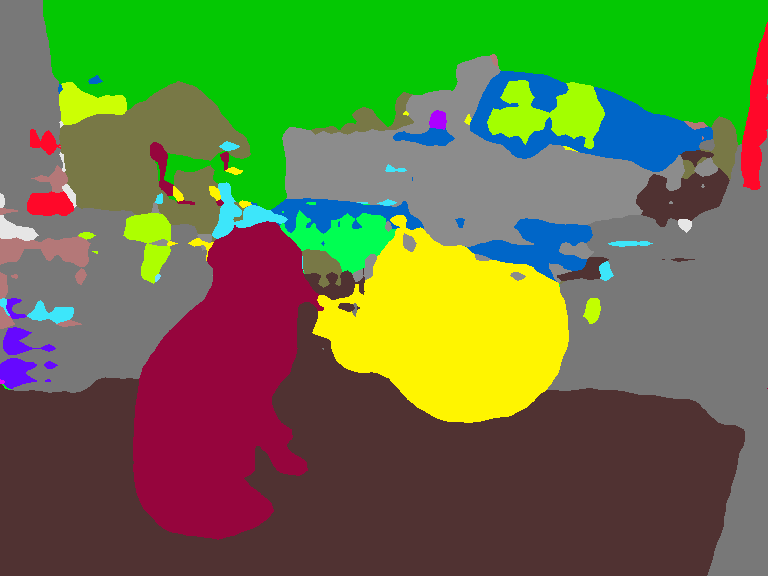

In [21]:
from gluoncv.utils.viz import get_color_pallete

prediction_image = get_color_pallete(prediction, 'ade20k')
prediction_image